In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio

In [2]:
im = imageio.imread('./imgs/s3/3.pgm')
im = im.astype(np.uint8)

im

Array([[101, 106, 102, ..., 108, 107, 108],
       [101, 104, 102, ..., 106, 108, 105],
       [ 99, 104, 102, ..., 108, 106, 111],
       ...,
       [ 64,  69,  75, ...,  42,  48,  48],
       [ 74,  81,  85, ...,  46,  48,  44],
       [ 77,  83,  84, ...,  46,  50,  45]], dtype=uint8)

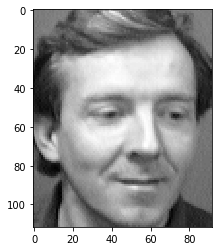

In [4]:
plt.imshow(im, cmap='gray')

In [5]:
im_original = im

im = im / 255

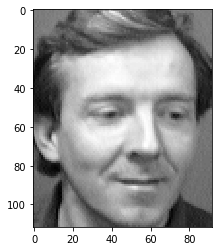

In [7]:
plt.imshow(im, cmap='gray')

In [8]:
from glob import iglob

In [9]:
caras = pd.DataFrame([])

for path in iglob("./imgs/*/*.pgm"):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)

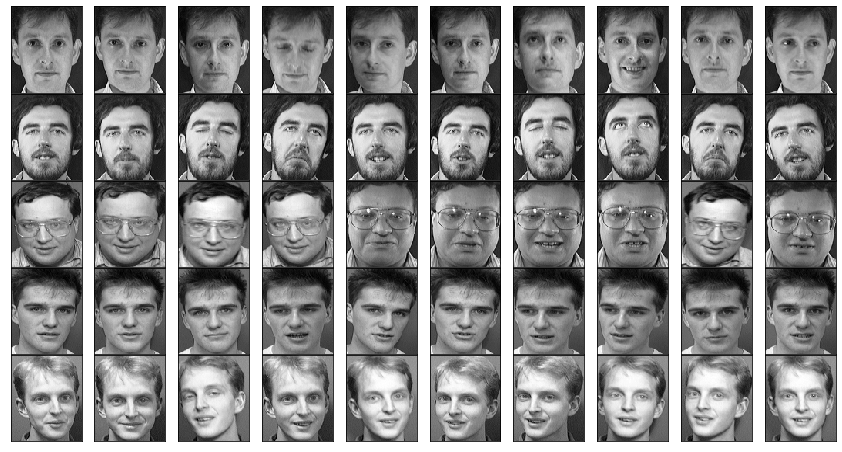

In [15]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8), subplot_kw={'xticks': [], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112, 92), cmap='gray')

In [17]:
from sklearn.decomposition import PCA

In [29]:
caras_pca = PCA(n_components=0.5)
caras_pca.fit(caras)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

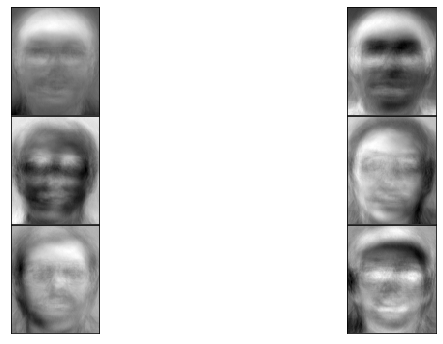

In [30]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112, 92), cmap='gray')

In [31]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

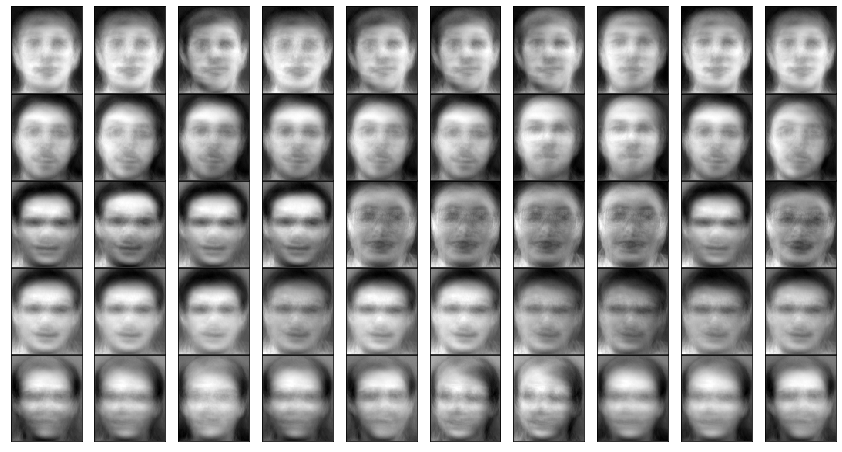

In [33]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8), subplot_kw={'xticks': [], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112, 92), cmap='gray')